In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Load the dataset
customers_df = pd.read_csv("customers.csv")
denorm_customers_df = customers_df.copy()
scaler = StandardScaler()
customers_df[['Age', 'Income', 'Score']] = scaler.fit_transform(customers_df[['Age', 'Income', 'Score']])

This code applies K-Means clustering to the dataset for k = 2 to 10, computing the Within-Cluster Sum of Squares (WCSS) for each value. The Elbow Method is the chosen heurtistic for identifying the optimal k by plotting WCSS against k, where the "elbow point" represents the best balance between cluster compactness and model simplicity, preventing both underfitting and overfitting.

WCSS values for different k:
k=2: WCSS=389.39
k=3: WCSS=304.95
k=4: WCSS=205.23
k=5: WCSS=168.25
k=6: WCSS=133.89
k=7: WCSS=133.56
k=8: WCSS=107.55
k=9: WCSS=104.01
k=10: WCSS=93.54


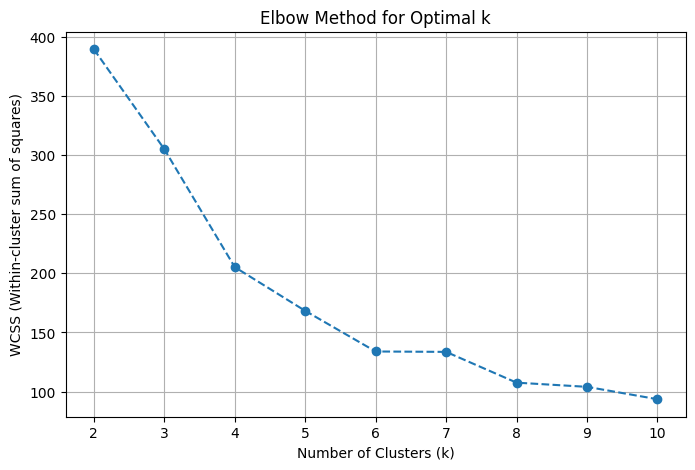

In [11]:
wcss = []
k_values = list(range(2, 11))
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(customers_df[['Age', 'Income', 'Score']])
    wcss.append(kmeans.inertia_)

print("WCSS values for different k:")
for k, w in zip(k_values, wcss):
    print(f"k={k}: WCSS={w:.2f}")

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title("Elbow Method for Optimal k")
plt.grid()
plt.show()

Based on the WCSS values and the plot, **k = 4 is the best choice**, as it marks the sharpest drop in WCSS (WCSS reduces by 99.72) before diminishing returns set in. However, k = 5 is also a reasonable alternative if finer segmentation is needed, but additional clusters beyond this point provide little improvement.

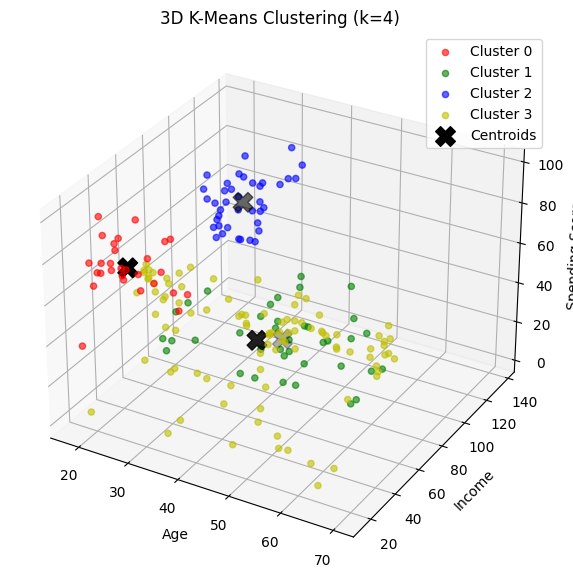


Cluster Summary:
               Age     Income      Score
Cluster                                 
0        24.821429  28.714286  74.250000
1        40.394737  87.000000  18.631579
2        32.692308  86.538462  82.128205
3        44.894737  48.705263  42.631579


In [16]:
best_k = 4  

# Perform K-means clustering with k=4
kmeans = KMeans(n_clusters=best_k, random_state=7)
denorm_customers_df['Cluster'] = kmeans.fit_predict(denorm_customers_df[['Age', 'Income', 'Score']])

# Extract centroids
centroids = kmeans.cluster_centers_

# 3D Scatter Plot (Denormalized Axes)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to clusters
colors = ['r', 'g', 'b', 'y']

# Plot each cluster
for i in range(best_k):
    cluster_points = denorm_customers_df[denorm_customers_df['Cluster'] == i]
    ax.scatter(cluster_points['Age'], cluster_points['Income'], cluster_points['Score'], 
               c=colors[i], label=f'Cluster {i}', alpha=0.6)

# Plot centroids
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], 
           c='black', marker='X', s=200, label='Centroids')

# Labels and legend
ax.set_xlabel("Age")
ax.set_ylabel("Income")
ax.set_zlabel("Spending Score")
ax.set_title(f"3D K-Means Clustering (k={best_k})")
ax.legend()
plt.show()

# Display cluster summary
summary = denorm_customers_df.groupby('Cluster')[['Age', 'Income', 'Score']].mean()
print("\nCluster Summary:")
print(summary)

The 3D K-Means Clustering segmentation reveals four distinct customer groups based on Age, Income, and Spending Score. Cluster 0 (Young High Spenders) consists of younger individuals (avg. 24.8 years) with lower incomes (28.7K) but high spending scores (74.3), likely students or early-career individuals making impulsive purchases. Cluster 1 (Middle-Aged Low Spenders) includes middle-aged individuals (40.4 years) with high incomes (87K) but low spending scores (18.6), suggesting conservative financial behavior. Cluster 2 (Young High-Income High Spenders) features younger individuals (32.7 years) with high incomes (86.5K) and high spending scores (82.1), likely professionals or affluent consumers who prioritize lifestyle spending. Cluster 3 (Older Moderate Spenders) represents an older group (44.9 years) with moderate incomes (48.7K) and balanced spending (42.6), possibly families or retirees with practical spending habits. Marketers can leverage this segmentation to target high spenders (Clusters 0 & 2) with luxury branding, influencer marketing, and social media campaigns, while re-engaging low spenders (Clusters 1 & 3) through loyalty programs, practical offers, and personalized promotions to drive engagement and spending.


WCSS values for ('Age', 'Income'):
k=2: WCSS=260.66
k=3: WCSS=132.86
k=4: WCSS=103.16
k=5: WCSS=81.41
k=6: WCSS=67.38
k=7: WCSS=60.86
k=8: WCSS=49.23
k=9: WCSS=41.70
k=10: WCSS=36.85


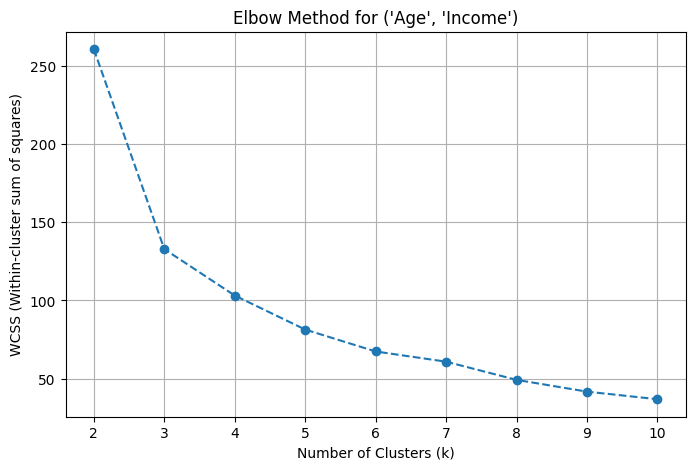


WCSS values for ('Age', 'Score'):
k=2: WCSS=189.39
k=3: WCSS=124.34
k=4: WCSS=89.87
k=5: WCSS=82.90
k=6: WCSS=64.48
k=7: WCSS=46.83
k=8: WCSS=40.85
k=9: WCSS=35.21
k=10: WCSS=29.44


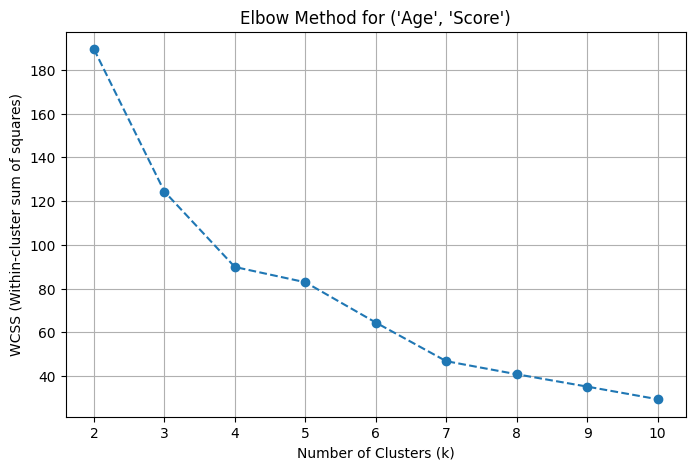


WCSS values for ('Income', 'Score'):
k=2: WCSS=270.16
k=3: WCSS=157.70
k=4: WCSS=109.23
k=5: WCSS=65.57
k=6: WCSS=57.38
k=7: WCSS=47.34
k=8: WCSS=44.11
k=9: WCSS=41.79
k=10: WCSS=32.16


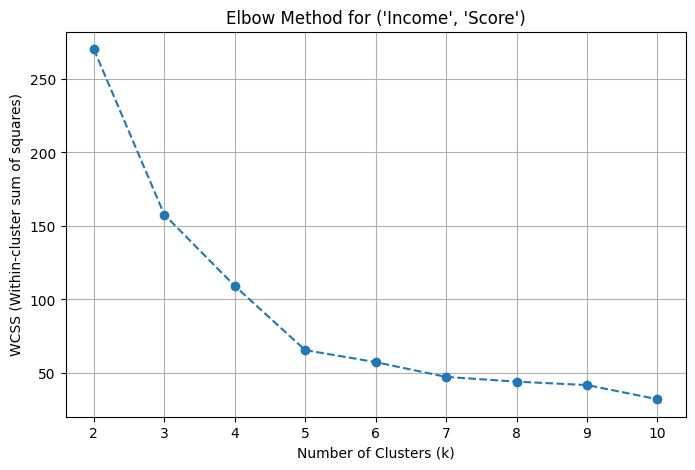

In [17]:
# Define feature sets for different clustering attempts
feature_sets = [("Age", "Income"), ("Age", "Score"), ("Income", "Score")]
k_values = list(range(2, 11))  # Define k range

for features in feature_sets:
    wcss = []  # Store WCSS values
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=7)
        kmeans.fit(customers_df[list(features)])
        wcss.append(kmeans.inertia_)
    
    print(f"\nWCSS values for {features}:")
    for k, w in zip(k_values, wcss):
        print(f"k={k}: WCSS={w:.2f}")
        
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, wcss, marker='o', linestyle='--')
    plt.xlabel("Number of Clusters (k)")
    plt.ylabel("WCSS (Within-cluster sum of squares)")
    plt.title(f"Elbow Method for {features}")
    plt.grid()
    plt.show()

Based on the Elbow Method, the optimal number of clusters for ('Age', 'Income') and ('Age', 'Score') is k=4, as the WCSS shows significant drops up to this point before diminishing returns. For ('Age', 'Income'), WCSS decreases by 127.80 from k=2 to k=3 and by 29.70 from k=3 to k=4, but beyond k=4, the decrease slows to 21.75, 14.03, and smaller values. Similarly, for ('Age', 'Score'), WCSS drops by 65.05 from k=2 to k=3 and by 34.47 from k=3 to k=4, but beyond k=4, the decreases are much smaller at 6.97, 18.42, and then diminishing further. For ('Income', 'Score'), WCSS decreases significantly by 112.46 from k=2 to k=3, 48.47 from k=3 to k=4, and 43.66 from k=4 to k=5, but beyond k=5, the drops slow to 8.19, 10.04, and smaller values. These selections balance variance reduction and model simplicity, ensuring well-defined clusters without over-segmentation.

**Hence, the best k for ('Age', 'Income') and ('Age', 'Score') is k=4; the best k for ('Income', 'Score') is 5.**

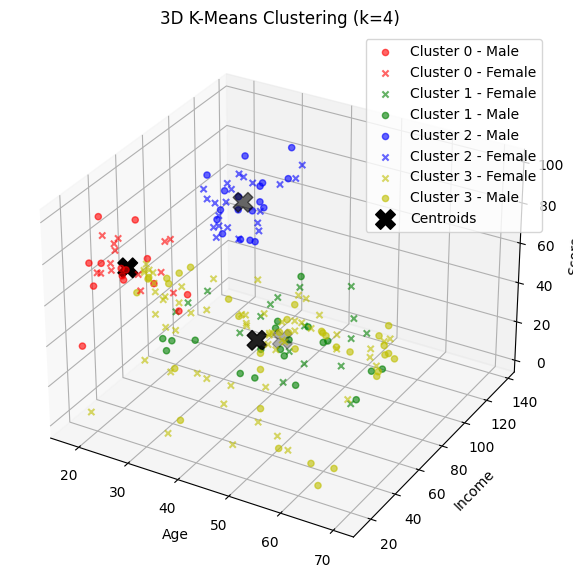


Cluster Summary (Mean Values in Denormalized Space):
               Age     Income      Score
Cluster                                 
0        24.821429  28.714286  74.250000
1        40.394737  87.000000  18.631579
2        32.692308  86.538462  82.128205
3        44.894737  48.705263  42.631579


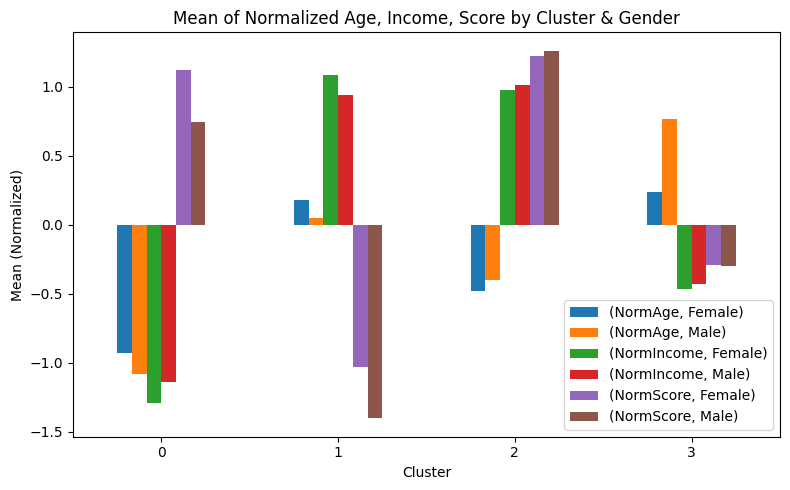

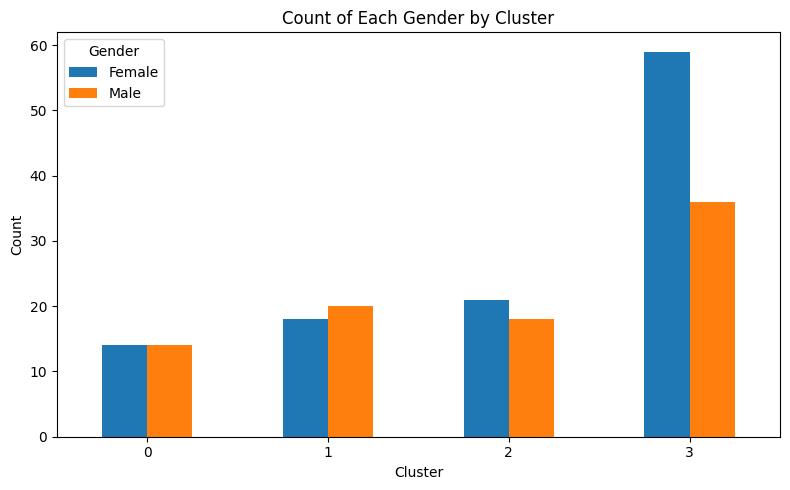

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# ----------------------------------------------------------------------------------
# 1) CLUSTER AND 3D PLOT ON DENORMALIZED DATA
# ----------------------------------------------------------------------------------

# Assume denorm_customers_df is already a DataFrame with columns:
#   ["Age", "Income", "Score", "Gender"]
# containing the denormalized data.

best_k = 4

# Perform K-means clustering with k=4 on the denormalized data
kmeans = KMeans(n_clusters=best_k, random_state=7)
denorm_customers_df['Cluster'] = kmeans.fit_predict(
    denorm_customers_df[['Age', 'Income', 'Score']]
)

# Extract centroids
centroids = kmeans.cluster_centers_

# 3D Scatter Plot (Denormalized Axes)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Assign distinct colors to clusters
cluster_colors = ['r', 'g', 'b', 'y']  # Adjust or extend as needed

# Assign markers based on gender
marker_map = {
    'Male': 'o',     # circle
    'Female': 'x'    # square
}

# To avoid repeated legend entries, keep track of which labels we've used
used_legend_labels = set()

# Plot each cluster, splitting by gender
for cluster_id in range(best_k):
    cluster_data = denorm_customers_df[denorm_customers_df['Cluster'] == cluster_id]
    
    for gender_val in cluster_data['Gender'].unique():
        gender_data = cluster_data[cluster_data['Gender'] == gender_val]
        
        color = cluster_colors[cluster_id]
        marker = marker_map.get(gender_val, 'o')  # default to 'o'
        
        legend_label = f"Cluster {cluster_id} - {gender_val}"
        if legend_label in used_legend_labels:
            legend_label = None
        else:
            used_legend_labels.add(legend_label)
        
        ax.scatter(
            gender_data['Age'],
            gender_data['Income'],
            gender_data['Score'],
            c=color,
            marker=marker,
            alpha=0.6,
            label=legend_label
        )

# Plot centroids in black with a large "X"
ax.scatter(
    centroids[:, 0], centroids[:, 1], centroids[:, 2],
    c='black', marker='X', s=200, label='Centroids'
)

# Axis labels and title
ax.set_xlabel("Age")
ax.set_ylabel("Income")
ax.set_zlabel("Score")
ax.set_title(f"3D K-Means Clustering (k={best_k})")

# Show legend and plot
ax.legend()
plt.show()

# Optional: Display cluster summary (mean in denormalized space)
summary = denorm_customers_df.groupby('Cluster')[['Age', 'Income', 'Score']].mean()
print("\nCluster Summary (Mean Values in Denormalized Space):")
print(summary)

# ----------------------------------------------------------------------------------
# 2) SEPARATE BAR PLOT FOR MEAN (NORMALIZED) FEATURES BY CLUSTER
# ----------------------------------------------------------------------------------

# We want to show the means of Age, Income, Score *after* normalization,
# but keep the same cluster labels from the above step.

# (A) Create a normalized version of "Age", "Income", and "Score"
scaler = StandardScaler()
X_norm = scaler.fit_transform(denorm_customers_df[['Age', 'Income', 'Score']])

# Put these normalized features into a new DataFrame
# Ensure it has the same index order as denorm_customers_df
norm_df = pd.DataFrame(X_norm, columns=['NormAge', 'NormIncome', 'NormScore'], 
                       index=denorm_customers_df.index)

# Add the existing cluster assignments and gender so we can group by them
norm_df['Cluster'] = denorm_customers_df['Cluster']
norm_df['Gender'] = denorm_customers_df['Gender']

# (B) Compute mean of these normalized features by (Cluster, Gender)
cluster_gender_means_norm = norm_df.groupby(['Cluster', 'Gender'])[['NormAge', 'NormIncome', 'NormScore']].mean()

# (C) Unstack so that columns become "Gender"
cluster_gender_means_norm_unstacked = cluster_gender_means_norm.unstack(level='Gender')

# (D) Plot as a side-by-side bar chart (MEAN values of normalized features)
cluster_gender_means_norm_unstacked.plot(kind='bar', figsize=(8, 5))
plt.title("Mean of Normalized Age, Income, Score by Cluster & Gender")
plt.xlabel("Cluster")
plt.ylabel("Mean (Normalized)")
plt.xticks(rotation=0)
plt.legend(loc="best")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------------------------------
# 3) BAR PLOT COUNTING THE NUMBER OF Males/Females PER CLUSTER
# ----------------------------------------------------------------------------------

# We can do this directly with the denorm_customers_df, which has 'Cluster' & 'Gender'
cluster_gender_counts = denorm_customers_df.groupby(['Cluster', 'Gender']).size().unstack(fill_value=0)

# Plot side-by-side bar chart
cluster_gender_counts.plot(kind='bar', stacked=False, figsize=(8, 5))
plt.title("Count of Each Gender by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Gender", loc="best")
plt.tight_layout()
plt.show()


It appears that **both genders** are generally well‐represented across most clusters, although the **bar plot** showing **gender counts** reveals an **imbalance** in **Cluster 3**, which contains a substantially **higher number** of **female** customers than male customers. This imbalance suggests that while Clusters 0, 1, and 2 each capture a relatively even mix of men and women, Cluster 3 might skew toward marketing strategies or product offerings that resonate more strongly with its predominantly female clientele.

Turning to the **mean bar chart** of **normalized features**, there are **notable gender differences** within several clusters. In **Cluster 3**, for example, **males** tend to be **significantly older** than their female counterparts, even though both groups share other traits such as moderate spending or average income. By contrast, **Cluster 0** shows that **females** in this segment have **considerably higher** spending scores compared to the men, reinforcing the idea that even within one “young and high‐spending” cluster, it may be worthwhile to differentiate marketing tactics for **younger female** consumers who appear particularly inclined to spend more.

Taken together, these observations support the idea that **splitting** an existing cluster into **male** and **female** sub‐segments can be valuable in certain cases. In **Cluster 0**, for instance, devoting a larger share of the **marketing budget** to female consumers—whose spending intensity is higher—might yield greater returns. At the same time, one would also want to examine whether the difference in age between males and females in **Cluster 3** calls for a more nuanced approach, such as promotions specifically tailored for older men versus those geared toward younger, moderate‐spending women. Ultimately, the decision to **further subdivide** along gender lines hinges on **business context** and **goals**: if gender aligns closely with consumer preferences and spending behaviors, including it more explicitly in segmentation or post‐analysis can refine a marketing strategy. Otherwise, a single cluster that merges both sexes may be sufficient if these internal gender differences do not translate into distinct promotional or product needs.

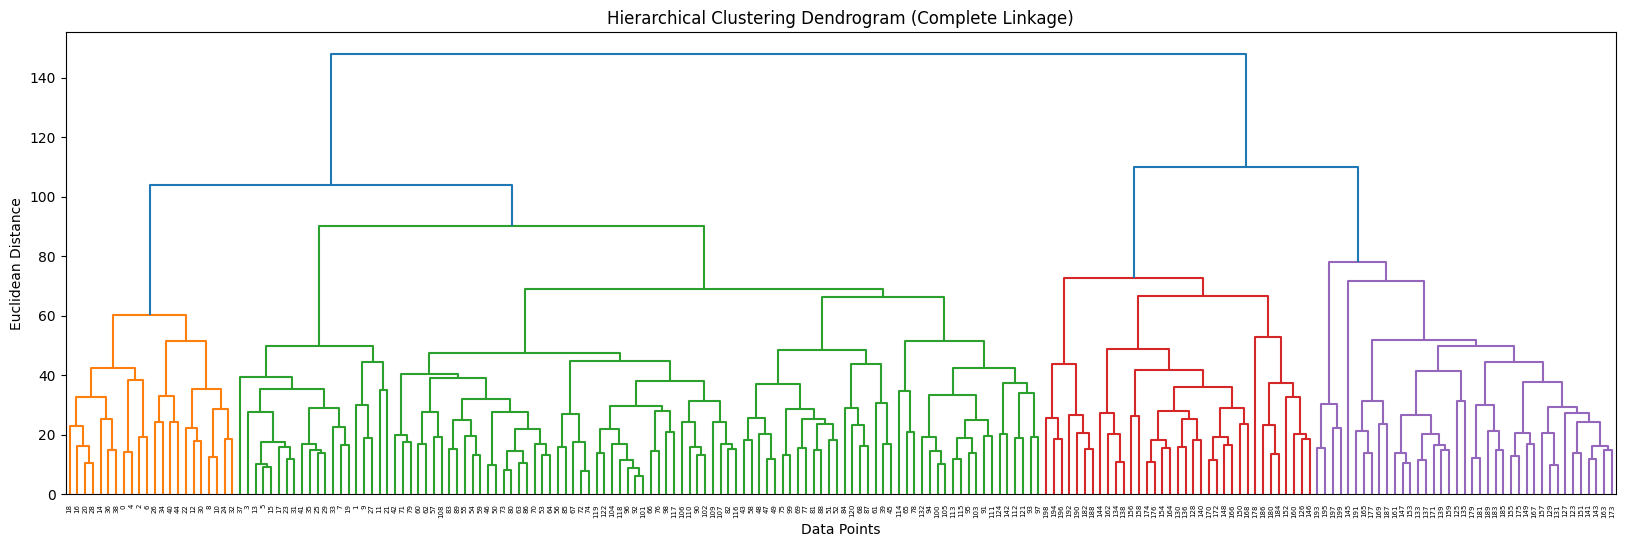

In [45]:
noisy_df = pd.read_csv("customers_noisy.csv")

# Create hierarchical clustering dendrogram on COMPLETE LINKAGE
plt.figure(figsize=(20, 6))
linkage_matrix = sch.linkage(noisy_df.iloc[:, 1:], method='complete')
dendrogram = sch.dendrogram(linkage_matrix)

# Label axes and set title
plt.title("Hierarchical Clustering Dendrogram (Complete Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

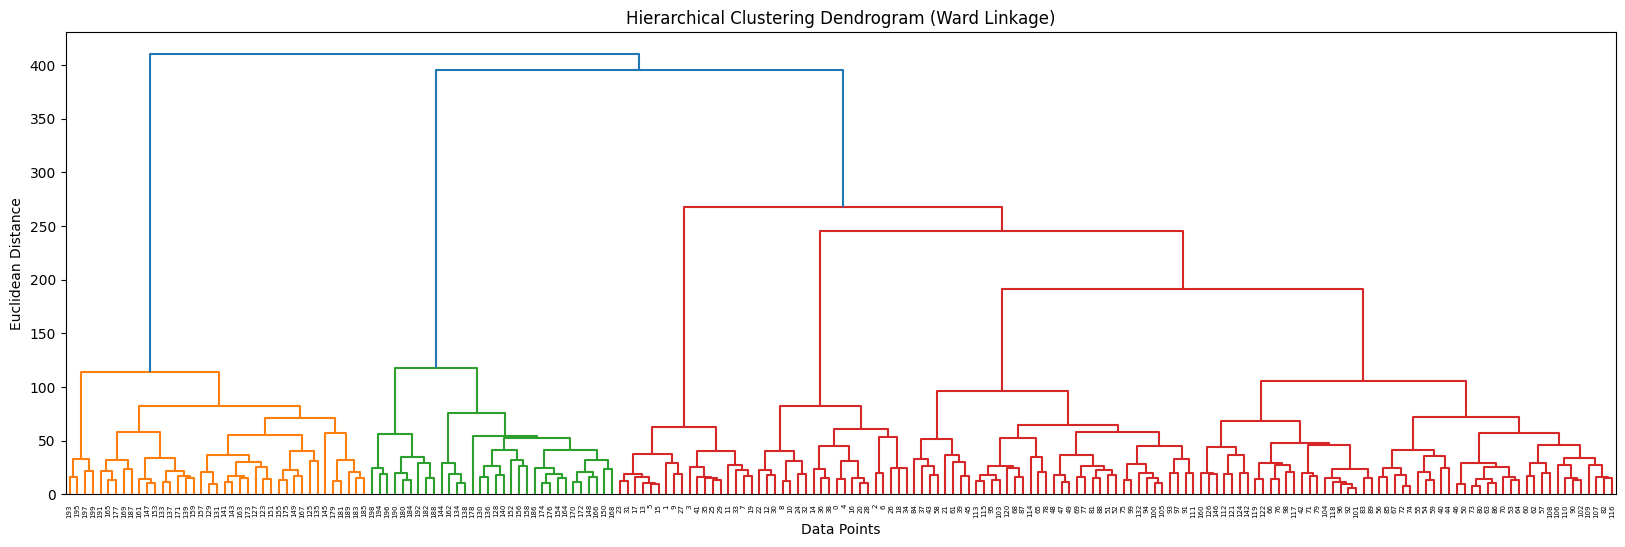

In [46]:

# Create hierarchical clustering dendrogram on WARD
plt.figure(figsize=(20, 6))
linkage_matrix = sch.linkage(noisy_df.iloc[:, 1:], method='ward')
dendrogram = sch.dendrogram(linkage_matrix)

# Label axes and set title
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

The dendrogram suggests four main clusters, as indicated by the color separation, but noisy features may be introducing extra variance, making the structure less distinct. Using complete linkage, which merges clusters based on the farthest distances between points, amplifies this noise and may result in less meaningful segmentation compared to K-Means, where clusters were more clearly defined.

Switching to Ward linkage, which minimizes variance when merging clusters, leads to three major clusters instead of four. However, within the red cluster, there appear to be subclusters that could represent distinct customer segments. This suggests that while Ward linkage improves compactness, it may over-merge some groups, potentially obscuring important variations within customer behavior.

To refine the clustering, we could explore a hybrid approach—using Ward linkage for its variance-reducing properties while considering additional segmentation within larger clusters. Alternatively, removing or reducing the weight of noisy features may help clarify the natural structure of customer groups, leading to more precise and actionable insights